<a href="https://colab.research.google.com/github/mbgarba/ML-competition--Anomaly-Detection-on-offshore-naturally-flowing-wells-main-/blob/main/Copy_of_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1 P-PDG Pressure at the PDG Pa
# 2 P-TPT Pressure at the TPT Pa
# 3 T-TPT Temperature at the TPT deg◦C
# 4 P-MON-CKP Pressure upstream of the PCK Pa
# 5 T-JUS-CKP Temperature downstream of the PCK deg◦C
# 6 P-JUS-CKGL Pressure downstream of the GLCK Pa
# 7 T-JUS-CKGL Temperature downstream of the GLCK deg◦C
# 8 QGL Gas lift flow rate sm^3/s
# 9 timestamp
# 10 Class

In [ ]:
# Data Organization
# Data Cleaning
# Feature Engineering
# Temporal Split

In [ ]:
# Import required libraries
import os
import pandas as pd
import numpy as np
from google.colab import drive
import glob
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Organization**

In [ ]:
import pandas as pd
import os
import numpy as np
from glob import glob

def analyze_folder(folder_path):
    all_dfs = []
    invalid_classes = []

    # Get all CSV files in the folder
    files = glob(os.path.join(folder_path, '*.csv'))

    for file in files:
        df = pd.read_csv(file)
        all_dfs.append(df)

        # Check for invalid classes (not between 0-8)
        if 'class' in df.columns:
            invalid = df[~df['class'].between(0, 8) & df['class'].notna()]
            if len(invalid) > 0:
                invalid_classes.append((file, invalid['class'].unique()))

    # Combine all DataFrames
    combined_df = pd.concat(all_dfs, ignore_index=True)

    # Calculate missing values
    missing_vals = (combined_df.isnull().sum() / len(combined_df)) * 100

    # Count unique values in class (excluding missing)
    class_counts = combined_df['class'].value_counts().sort_index()

    return missing_vals, class_counts, invalid_classes

base_path = '/content/drive/My Drive/Colab Notebooks/KFUPM/data/data'
folders = range(9)  # folders 0 to 8

for folder in folders:
    folder_path = os.path.join(base_path, str(folder))
    print(f"\nAnalyzing Folder {folder}")
    missing_vals, class_counts, invalid_classes = analyze_folder(folder_path)

    print("\nMissing Values (%):")
    print(missing_vals)

    print("\nClass Distribution:")
    print(class_counts)

    if invalid_classes:
        print("\nInvalid Classes Found:")
        for file, classes in invalid_classes:
            print(f"File: {file}")
            print(f"Invalid values: {classes}")


Analyzing Folder 0

Missing Values (%):
timestamp       0.000000
P-PDG           0.035734
P-TPT           0.035734
T-TPT           0.035865
P-MON-CKP      10.134540
T-JUS-CKP      14.785436
P-JUS-CKGL     25.627142
T-JUS-CKGL    100.000000
QGL            25.482819
class           0.000000
dtype: float64

Class Distribution:
class
0    9956791
Name: count, dtype: int64

Analyzing Folder 1

Missing Values (%):
timestamp       0.000000
P-PDG           0.000000
P-TPT           0.000000
T-TPT           0.000000
P-MON-CKP       0.000000
T-JUS-CKP       0.000000
P-JUS-CKGL     98.683956
T-JUS-CKGL    100.000000
QGL            98.683956
class           0.011337
dtype: float64

Class Distribution:
class
0.0       803319
1.0      2905974
101.0    5278295
Name: count, dtype: int64

Invalid Classes Found:
File: /content/drive/My Drive/Colab Notebooks/KFUPM/data/data/1/WELL-00001_20140124213136.csv
Invalid values: [101.]
File: /content/drive/My Drive/Colab Notebooks/KFUPM/data/data/1/WELL-00002_20

In [ ]:
import pandas as pd
import os
import numpy as np
from glob import glob

def clean_class_values(value):
   if pd.isna(value):
       return value

   # Convert to string to handle decimal points
   str_val = str(value)
   if str_val.startswith('101'):
       return 1
   elif str_val.startswith('102'):
       return 2
   elif str_val.startswith('103'):
       return 3
   elif str_val.startswith('104'):
       return 4
   elif str_val.startswith('105'):
       return 5
   elif str_val.startswith('106'):
       return 6
   elif str_val.startswith('107'):
       return 7
   elif str_val.startswith('108'):
       return 8
   return value

def analyze_folder(folder_path):
   all_dfs = []

   files = glob(os.path.join(folder_path, '*.csv'))

   for file in files:
       df = pd.read_csv(file)
       if 'class' in df.columns:
           df['class'] = df['class'].apply(clean_class_values)
       all_dfs.append(df)

   combined_df = pd.concat(all_dfs, ignore_index=True)
   missing_vals = (combined_df.isnull().sum() / len(combined_df)) * 100

   return missing_vals

base_path = '/content/drive/My Drive/Colab Notebooks/KFUPM/data/data'
all_missing_vals = []

# Analyze each folder
for folder in range(9):
   folder_path = os.path.join(base_path, str(folder))
   print(f"\nFolder {folder} Missing Values (%):")
   missing_vals = analyze_folder(folder_path)
   print(missing_vals)
   all_missing_vals.append(missing_vals)

# Calculate average missing values across all folders
avg_missing_vals = pd.concat(all_missing_vals, axis=1).mean(axis=1)
print("\nAverage Missing Values Across All Folders (%):")
print(avg_missing_vals)


Folder 0 Missing Values (%):
timestamp       0.000000
P-PDG           0.035734
P-TPT           0.035734
T-TPT           0.035865
P-MON-CKP      10.134540
T-JUS-CKP      14.785436
P-JUS-CKGL     25.627142
T-JUS-CKGL    100.000000
QGL            25.482819
class           0.000000
dtype: float64

Folder 1 Missing Values (%):
timestamp       0.000000
P-PDG           0.000000
P-TPT           0.000000
T-TPT           0.000000
P-MON-CKP       0.000000
T-JUS-CKP       0.000000
P-JUS-CKGL     98.683956
T-JUS-CKGL    100.000000
QGL            98.683956
class           0.011337
dtype: float64

Folder 2 Missing Values (%):
timestamp       0.000000
P-PDG           0.099441
P-TPT           0.099441
T-TPT           0.099441
P-MON-CKP      17.893695
T-JUS-CKP      22.198384
P-JUS-CKGL     97.439884
T-JUS-CKGL    100.000000
QGL            96.582691
class           0.165627
dtype: float64

Folder 3 Missing Values (%):
timestamp       0.000000
P-PDG           0.012019
P-TPT           0.012019
T-TPT     

# **Data Cleaning**

In [ ]:
import pandas as pd
import os
import numpy as np
from glob import glob

def clean_class_values(value):
   if pd.isna(value):
       return value

   str_val = str(value)
   if str_val.startswith('10'):
       return int(str_val[2])
   return value if 0 <= value <= 8 else np.nan

def clean_data(folder_path):
    files = glob(os.path.join(folder_path, '*.csv'))
    all_dfs = []

    for file in files:
        df = pd.read_csv(file)
        if 'class' in df.columns:
            df['class'] = df['class'].apply(lambda x: int(str(x)[2]) if str(x).startswith('10') else x if 0 <= float(x) <= 8 else np.nan)
        all_dfs.append(df)

    combined_df = pd.concat(all_dfs, ignore_index=True)
    combined_df = combined_df.drop(['T-JUS-CKGL', 'P-JUS-CKGL', 'QGL'], axis=1)
    combined_df = combined_df.dropna(subset=['class'])

    # Forward fill then backward fill for T-TPT
    combined_df['T-TPT'] = combined_df['T-TPT'].fillna(method='ffill').fillna(method='bfill')

    # Linear interpolation for remaining columns
    numerical_cols = ['P-PDG', 'P-TPT', 'P-MON-CKP', 'T-JUS-CKP']
    combined_df[numerical_cols] = combined_df[numerical_cols].interpolate(method='linear')

    return combined_df

base_path = '/content/drive/My Drive/Colab Notebooks/KFUPM/data/data'
cleaned_dfs = []

for folder in range(9):
   folder_path = os.path.join(base_path, str(folder))
   cleaned_df = clean_data(folder_path)
   cleaned_dfs.append(cleaned_df)

final_df = pd.concat(cleaned_dfs, ignore_index=True)

# Verify class distribution after cleaning
class_dist = final_df['class'].value_counts().sort_index()
print("\nClass Distribution after cleaning:")
print(class_dist)

# Verify remaining missing values
missing_vals = (final_df.isnull().sum() / len(final_df)) * 100
print("\nRemaining Missing Values (%):")
print(missing_vals)


Class Distribution after cleaning:
class
0.0    11977872
1.0     8184269
2.0      508187
3.0     4834079
4.0     2462076
5.0    12971074
6.0     5436997
7.0     2410256
8.0     2123275
Name: count, dtype: int64

Remaining Missing Values (%):
timestamp    0.0
P-PDG        0.0
P-TPT        0.0
T-TPT        0.0
P-MON-CKP    0.0
T-JUS-CKP    0.0
class        0.0
dtype: float64


In [ ]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

    final_df['class'] = final_df['class'].astype('int8')
    final_df['timestamp'] = pd.to_datetime(final_df['timestamp'], format='%Y-%m-%d %H:%M:%S')  # Specify format for faster processing


final_df = reduce_mem_usage(final_df)

Mem. usage decreased to 1456.49 Mb (46.4% reduction)


# **Feature Engineering**

In [ ]:
def engineer_features(df):
    # Pressure differentials
    df['P_DIFF_PDG_TPT'] = df['P-PDG'] - df['P-TPT']
    df['P_DIFF_TPT_CKP'] = df['P-TPT'] - df['P-MON-CKP']

    # Convert timestamp to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Time-based features
    df['hour'] = df['timestamp'].dt.hour
    df['day'] = df['timestamp'].dt.day
    df['day_of_week'] = df['timestamp'].dt.dayofweek

    # Rolling statistics (10-minute windows)
    sensors = ['P-PDG', 'P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP']
    for sensor in sensors:
        df[f'{sensor}_rolling_mean'] = df[sensor].rolling(window=10).mean()
        df[f'{sensor}_rolling_std'] = df[sensor].rolling(window=10).std()
        df[f'{sensor}_rate_change'] = df[sensor].diff()

    # Replace infinite values with NaN before filling
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Fill NaN from rolling calculations
    df = df.fillna(method='bfill')
    df = df.dropna()

    return df

# Apply feature engineering
final_df = engineer_features(final_df)

# Show new features
print("New Features Created:")
print(final_df.columns.tolist())

# Basic statistics of new features
print("\nFeature Statistics:")
print(final_df.describe())

TypeError: No matching signature found

# **Temporal Split**

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Sort by timestamp to maintain temporal order
final_df = final_df.sort_values('timestamp')

# Calculate split points
n_samples = len(final_df)
train_size = int(0.7 * n_samples)
val_size = int(0.15 * n_samples)

# Split data into train, validation, and test sets while maintaining temporal order
train_df = final_df[:train_size]
val_df = final_df[train_size:train_size + val_size]
test_df = final_df[train_size + val_size:]

# Separate features and target for each split
X_train = train_df.drop(['timestamp', 'class'], axis=1)
y_train = train_df['class']

X_val = val_df.drop(['timestamp', 'class'], axis=1)
y_val = val_df['class']

X_test = test_df.drop(['timestamp', 'class'], axis=1)
y_test = test_df['class']


# Fit scaler only on training data and transform all sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# # # Convert back to DataFrames if needed
# # X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# # X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns)
# # X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# # Store timestamps for reference (optional)
# train_timestamps = train_df['timestamp']
# val_timestamps = val_df['timestamp']
# test_timestamps = test_df['timestamp']

# Print length of train,val and test sets
print(f"Train set length: {len(train_df)}")
print(f"Validation set length: {len(val_df)}")
print(f"Test set length: {len(test_df)}")

Train set length: 35635659
Validation set length: 7636212
Test set length: 7636214


Epoch 1/50
139202/139202 ━━━━━━━━━━━━━━━━━━━━ 297s 2ms/step - accuracy: 0.9529 - loss: 0.1246 - val_accuracy: 0.2154 - val_loss: inf - learning_rate: 0.0010
Epoch 2/50
139202/139202 ━━━━━━━━━━━━━━━━━━━━ 286s 2ms/step - accuracy: 0.9441 - loss: 0.2191 - val_accuracy: 0.2181 - val_loss: nan - learning_rate: 0.0010
Epoch 3/50
139202/139202 ━━━━━━━━━━━━━━━━━━━━ 287s 2ms/step - accuracy: 0.9291 - loss: 0.2913 - val_accuracy: 0.2224 - val_loss: nan - learning_rate: 0.0010
Epoch 4/50
139202/139202 ━━━━━━━━━━━━━━━━━━━━ 287s 2ms/step - accuracy: 0.9283 - loss: 0.2936 - val_accuracy: 0.2168 - val_loss: nan - learning_rate: 0.0010
Epoch 5/50
139202/139202 ━━━━━━━━━━━━━━━━━━━━ 287s 2ms/step - accuracy: 0.9237 - loss: 0.3261 - val_accuracy: 0.1974 - val_loss: nan - learning_rate: 0.0010
Epoch 6/50
139202/139202 ━━━━━━━━━━━━━━━━━━━━ 287s 2ms/step - accuracy: 0.9470 - loss: 0.2123 - val_accuracy: 0.2010 - val_loss: nan - learning_rate: 2.0000e-04
Epoch 7/50
139202/139202 ━━━━━━━━━━━━━━━━━━━━ 287s 2ms

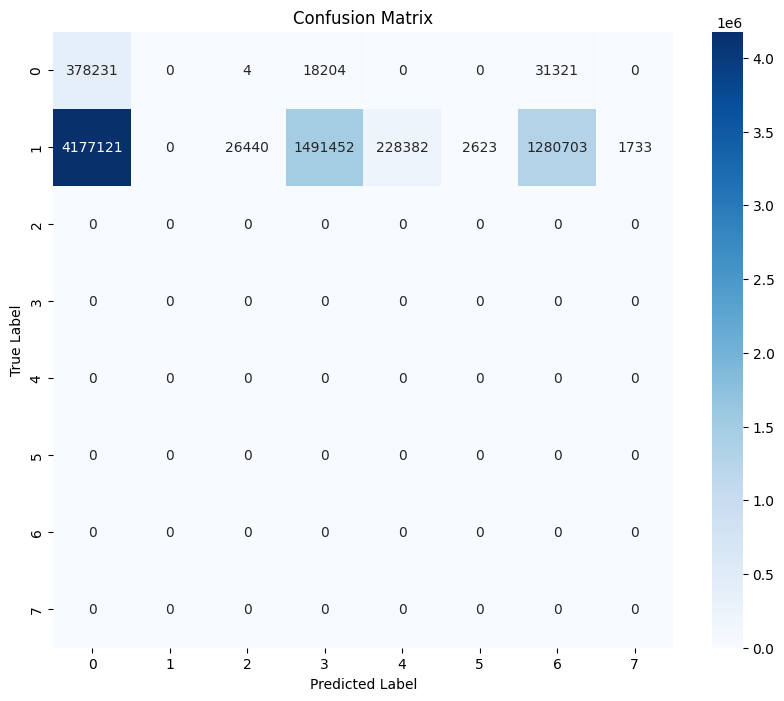

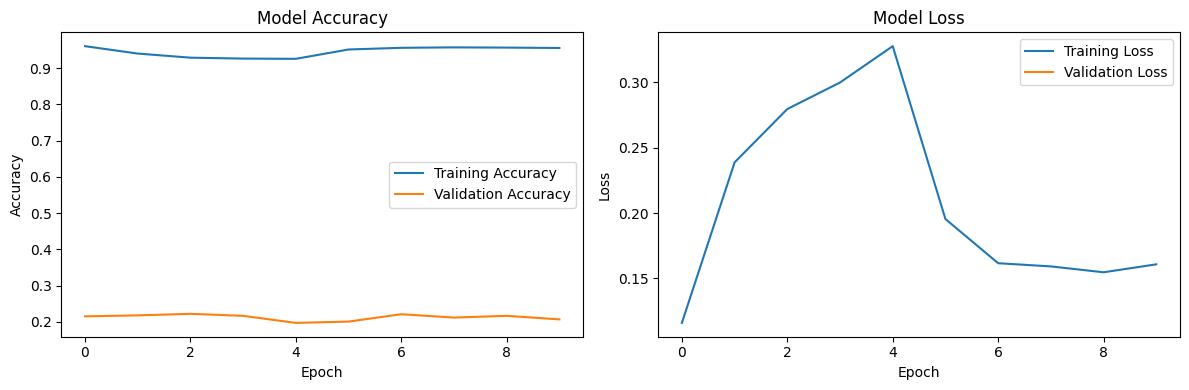

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Reshape data for 1D CNN (adding channel dimension)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_val_reshaped = X_val_scaled.reshape(X_val_scaled.shape[0], X_val_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)


# Compute class weights to handle imbalance
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

# Build 1D CNN Model
def create_1d_cnn_model(input_shape, num_classes):
    model = Sequential([
        # First Convolutional Block
        Conv1D(64, kernel_size=3, activation='relu',
               input_shape=input_shape,
               padding='same'),
        MaxPooling1D(pool_size=2),
        Dropout(0.25),

        # Second Convolutional Block
        Conv1D(128, kernel_size=3, activation='relu', padding='same'),
        MaxPooling1D(pool_size=2),
        Dropout(0.25),

        # Flatten and Dense Layers
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),

        # Output Layer
        Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.00001
)

# Create and train the model
num_classes = len(np.unique(y_train))
model = create_1d_cnn_model(
    input_shape=(X_train_reshaped.shape[1], 1),
    num_classes=num_classes
)

# Training
history = model.fit(
    X_train_reshaped, y_train,
    validation_data=(X_val_reshaped, y_val),
    epochs=50,
    batch_size=256,
    class_weight=class_weights,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(
    X_test_reshaped, y_test, verbose=0
)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Predictions
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Learning Curve Visualization
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# from sklearn.model_selection import train_test_split
# import numpy as np
# from sklearn.preprocessing import StandardScaler


# # Sort by timestamp to maintain temporal order
# final_df = final_df.sort_values('timestamp')

# # Remove timestamp from features but keep for reference
# timestamp = final_df['timestamp']
# features = final_df.drop(['timestamp', 'class'], axis=1)
# target = final_df['class']


# # Scale features
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features)
# scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# # # Split into train, validation, test (60%, 20%, 20%)
# # X_train_val, X_test, y_train_val, y_test = train_test_split(
# #    scaled_df, target, test_size=0.2, shuffle=False
# # )

# # X_train, X_valid, y_train, y_valid = train_test_split(
# #    X_train_val, y_train_val, test_size=0.25, shuffle=False
# # )

# # print("Dataset shapes:")
# # print(f"Training: {X_train.shape}")
# # print(f"Validation: {X_valid.shape}")
# # print(f"Test: {X_test.shape}")

# # # Class distribution in splits
# # print("\nClass distribution:")
# # print("Training:", np.bincount(y_train.astype(int)))
# # print("Validation:", np.bincount(y_valid.astype(int)))
# # print("Test:", np.bincount(y_test.astype(int)))

Dataset shapes:
Training: (30544851, 25)
Validation: (10181617, 25)
Test: (10181617, 25)

Class distribution:
Training: [10638212    73930   105003  4834079  1869856  7465802  5436997    38817
    82155]
Validation: [ 569932    9754  403184       0  592220 5505272       0 1060135 2041120]
Test: [ 769728 8100585       0       0       0       0       0 1311304]


In [ ]:
# prompt: generate an optimized Temporal Convolutional Networks with training data of about 35m rows and 25 features. the data are in X_train, X_val and X_test. It should use gpu

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Activation, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Separate features and target for each split
X_train = train_df.drop(['class'], axis=1)
y_train = train_df['class']

X_val = val_df.drop(['class'], axis=1)
y_val = val_df['class']

X_test = test_df.drop(['class'], axis=1)
y_test = test_df['class']



# Reshape input data for TCN (samples, timesteps, features)
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.values.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the TCN model
model = Sequential()

# Layer 1
model.add(Conv1D(filters=64, kernel_size=3, padding='same', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

# Layer 2
model.add(Conv1D(filters=128, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

# Layer 3
model.add(Conv1D(filters=256, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten and dense layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(9, activation='softmax')) # Output layer


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with GPU acceleration
with tf.device('/GPU:0'): # Specify GPU device
    history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# **LSTM**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np

# Separate features and target for each split
X_train = train_df.drop(['class'], axis=1)
y_train = train_df['class']

X_valid = val_df.drop(['class'], axis=1)
y_valid = val_df['class']

X_test = test_df.drop(['class'], axis=1)
y_test = test_df['class']

class WeightedSequenceGenerator:
    def __init__(self, X, y, sequence_length, batch_size):
        self.X = X
        self.y = y
        self.sequence_length = sequence_length
        self.batch_size = batch_size

        # Calculate class weights inside the generator
        class_counts = np.bincount(y.astype(int))
        total_samples = len(y)
        self.class_weights = total_samples / (len(class_counts) * class_counts)

    def generate(self):
        while True:
            for i in range(0, len(self.X) - self.sequence_length, self.batch_size):
                X_batch = []
                y_batch = []
                sample_weights = []

                for j in range(i, min(i + self.batch_size, len(self.X) - self.sequence_length)):
                    X_batch.append(self.X[j:(j + self.sequence_length)])
                    label = self.y[j + self.sequence_length]
                    y_batch.append(label)
                    # Add sample weight based on class
                    sample_weights.append(self.class_weights[int(label)])

                yield np.array(X_batch), np.array(y_batch), np.array(sample_weights)

def build_improved_lstm_model(input_shape, num_classes=9):
    model = Sequential([
        LSTM(32, input_shape=input_shape, return_sequences=True),
        BatchNormalization(),
        Dropout(0.5),

        LSTM(16),
        BatchNormalization(),
        Dropout(0.5),

        Dense(16, activation='relu'),
        BatchNormalization(),
        Dense(num_classes, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(
        learning_rate=0.0001,
        clipnorm=.5
    )

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Set parameters
sequence_length = 30
batch_size = 256

# Create generators with sample weights
train_gen = WeightedSequenceGenerator(
    X_train.values,
    y_train.values,
    sequence_length,
    batch_size
)

val_gen = WeightedSequenceGenerator(
    X_valid.values,
    y_valid.values,
    sequence_length,
    batch_size
)

test_gen = WeightedSequenceGenerator(
    X_test.values,
    y_test.values,
    sequence_length,
    batch_size
)

# Calculate steps
steps_per_epoch = (len(X_train) - sequence_length) // batch_size
validation_steps = (len(X_valid) - sequence_length) // batch_size
test_steps = (len(X_test) - sequence_length) // batch_size

# Callbacks
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=3,
        restore_best_weights=True
    ),
    ModelCheckpoint(
        'best_lstm_model.keras',
        monitor='val_accuracy',
        save_best_only=True
    )
]

# Build and train model
model = build_improved_lstm_model(input_shape=(sequence_length, X_train.shape[1]))

history = model.fit(
    train_gen.generate(),
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=val_gen.generate(),
    validation_steps=validation_steps,
    callbacks=callbacks
)

# Evaluate
test_results = model.evaluate(
    test_gen.generate(),
    steps=test_steps
)

print(f"Test Loss: {test_results[0]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")

<ipython-input-4-626d54140bdd>:27: RuntimeWarning: divide by zero encountered in divide
  self.class_weights = total_samples / (len(class_counts) * class_counts)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Invalid dtype: object

In [ ]:
X_train.iloc[1:20]

,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P_DIFF_PDG_TPT,P_DIFF_TPT_CKP,hour,day,...,P-TPT_rate_change,T-TPT_rolling_mean,T-TPT_rolling_std,T-TPT_rate_change,P-MON-CKP_rolling_mean,P-MON-CKP_rolling_std,P-MON-CKP_rate_change,T-JUS-CKP_rolling_mean,T-JUS-CKP_rolling_std,T-JUS-CKP_rate_change
50868395,2012-04-10 19:23:27,2.157074e+09,684189700.0,59.27158,1623155.0,39.83253,1.472884e+09,682566545.0,19,10,...,-145700.0,11.851696,24.985570,0.02620,1084589.96,284373.256727,-1989.0,39.83253,0.0,0.0
50868396,2012-04-10 19:23:28,2.157094e+09,684043900.0,59.29778,1621166.0,39.83253,1.473050e+09,682422734.0,19,10,...,-145800.0,17.781474,28.630896,0.02620,1151755.38,325298.007514,-1989.0,39.83253,0.0,0.0
50868397,2012-04-10 19:23:29,2.157114e+09,683898200.0,59.32397,1619176.0,39.83253,1.473216e+09,682279024.0,19,10,...,-145700.0,23.713871,30.614482,0.02619,1218716.42,347232.337097,-1990.0,39.83253,0.0,0.0
50868398,2012-04-10 19:23:30,2.157134e+09,683752500.0,59.35017,1617187.0,39.83253,1.473382e+09,682135313.0,19,10,...,-145700.0,29.648888,31.252684,0.02620,1285473.18,353857.097684,-1989.0,39.83253,0.0,0.0
50868399,2012-04-10 19:23:31,2.157154e+09,683639600.0,59.37636,1616547.0,39.83253,1.473514e+09,682023053.0,19,10,...,-112900.0,35.586524,30.628025,0.02619,1352160.56,346299.451575,-640.0,39.83253,0.0,0.0
50868400,2012-04-10 19:23:32,2.157174e+09,683526700.0,59.40256,1615907.0,39.83253,1.473647e+09,681910793.0,19,10,...,-112900.0,41.526780,28.656238,0.02620,1418778.56,323614.933493,-640.0,39.83253,0.0,0.0
50868401,2012-04-10 19:23:33,2.157194e+09,683413800.0,59.42875,1615267.0,39.83253,1.473780e+09,681798533.0,19,10,...,-112900.0,47.469655,25.018769,0.02619,1485327.18,282233.403519,-640.0,39.83253,0.0,0.0
50868402,2012-04-10 19:23:34,2.157214e+09,683300900.0,59.45495,1614626.0,39.83253,1.473913e+09,681686274.0,19,10,...,-112900.0,53.415150,18.768292,0.02620,1551806.33,211521.537447,-641.0,39.83253,0.0,0.0
50868403,2012-04-10 19:23:35,2.157234e+09,683188000.0,59.48114,1613986.0,39.83253,1.474046e+09,681574014.0,19,10,...,-112900.0,59.363264,0.079311,0.02619,1618216.10,3810.340483,-640.0,39.83253,0.0,0.0
50868404,2012-04-10 19:23:36,2.157254e+09,683075100.0,59.50734,1613346.0,39.83253,1.474179e+09,681461754.0,19,10,...,-112900.0,59.389460,0.079310,0.02620,1617036.30,3205.395563,-640.0,39.83253,0.0,0.0


# **RNN**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, BatchNormalization, Dropout
import numpy as np

class BasicSequenceGenerator:
    def __init__(self, X, y, sequence_length, batch_size):
        self.X = X
        self.y = y
        self.sequence_length = sequence_length
        self.batch_size = batch_size

        # Calculate balanced class weights with clipping to prevent extreme values
        class_counts = np.bincount(y.astype(int))
        total_samples = len(y)
        weights = total_samples / (len(class_counts) * class_counts)
        # Clip weights between 0.1 and 5.0 to maintain stability
        self.class_weights = np.clip(weights, 0.1, 5.0)

    def generate(self):
        while True:
            # Create smaller chunks for efficient processing
            chunk_size = min(100000, len(self.X) - self.sequence_length)
            start_idx = np.random.randint(0, len(self.X) - chunk_size - self.sequence_length)

            # Work with a chunk of data at a time
            X_chunk = self.X[start_idx:start_idx + chunk_size]
            y_chunk = self.y[start_idx:start_idx + chunk_size]

            # Shuffle indices within the chunk
            indices = np.arange(len(X_chunk) - self.sequence_length)
            np.random.shuffle(indices)

            for i in range(0, len(indices), self.batch_size):
                batch_indices = indices[i:min(i + self.batch_size, len(indices))]
                X_batch = []
                y_batch = []
                sample_weights = []

                for j in batch_indices:
                    X_batch.append(X_chunk[j:j + self.sequence_length])
                    label = y_chunk[j + self.sequence_length]
                    y_batch.append(label)
                    sample_weights.append(self.class_weights[int(label)])

                yield np.array(X_batch), np.array(y_batch), np.array(sample_weights)

def build_simple_rnn_model(input_shape, num_classes=9):
    """
    A simplified RNN model focused on stable training and basic pattern recognition.
    """
    model = Sequential([
        # Single RNN layer with moderate units
        SimpleRNN(32, input_shape=input_shape,
                 kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        BatchNormalization(),
        Dropout(0.2),  # Light dropout to maintain signal

        # Simple dense classifier
        Dense(16, activation='relu',
              kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        BatchNormalization(),
        Dense(num_classes, activation='softmax')
    ])

    # Conservative optimizer settings for stability
    optimizer = tf.keras.optimizers.Adam(
        learning_rate=0.0001,
        clipnorm=0.5
    )

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Training parameters optimized for stability
sequence_length = 15  # Shorter sequences for simpler patterns
batch_size = 64      # Smaller batches for better generalization

# Create data generators
train_gen = BasicSequenceGenerator(
    X_train.values,
    y_train.values,
    sequence_length,
    batch_size
)

val_gen = BasicSequenceGenerator(
    X_valid.values,
    y_valid.values,
    sequence_length,
    batch_size
)

test_gen = BasicSequenceGenerator(
    X_test.values,
    y_test.values,
    sequence_length,
    batch_size
)

# Calculate steps
steps_per_epoch = (len(X_train) - sequence_length) // batch_size
validation_steps = (len(X_valid) - sequence_length) // batch_size
test_steps = (len(X_test) - sequence_length) // batch_size

# Training callbacks for monitoring and early stopping
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=3,
        restore_best_weights=True,
        min_delta=0.01  # Minimum improvement required
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=2,
        min_lr=0.00001
    )
]

# Build and train model
model = build_simple_rnn_model(input_shape=(sequence_length, X_train.shape[1]))

history = model.fit(
    train_gen.generate(),
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=val_gen.generate(),
    validation_steps=validation_steps,
    callbacks=callbacks
)

# Evaluate the model
test_results = model.evaluate(
    test_gen.generate(),
    steps=test_steps
)

print(f"Test Loss: {test_results[0]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")

Epoch 1/10
477263/477263 ━━━━━━━━━━━━━━━━━━━━ 2340s 5ms/step - accuracy: 0.6104 - loss: 0.8394 - val_accuracy: 0.0453 - val_loss: 7.9564 - learning_rate: 1.0000e-04
Epoch 2/10
477263/477263 ━━━━━━━━━━━━━━━━━━━━ 2339s 5ms/step - accuracy: 0.7667 - loss: 0.6192 - val_accuracy: 0.4442 - val_loss: 9.2341 - learning_rate: 1.0000e-04
Epoch 3/10
477263/477263 ━━━━━━━━━━━━━━━━━━━━ 2340s 5ms/step - accuracy: 0.8236 - loss: 0.6251 - val_accuracy: 9.8263e-08 - val_loss: 8.0214 - learning_rate: 1.0000e-04
Epoch 4/10
477263/477263 ━━━━━━━━━━━━━━━━━━━━ 2336s 5ms/step - accuracy: 0.6680 - loss: 0.7604 - val_accuracy: 0.0650 - val_loss: 19.5027 - learning_rate: 5.0000e-05
Epoch 5/10
477263/477263 ━━━━━━━━━━━━━━━━━━━━ 2333s 5ms/step - accuracy: 0.6995 - loss: 0.7411 - val_accuracy: 0.3270 - val_loss: 8.9954 - learning_rate: 5.0000e-05
159087/159087 ━━━━━━━━━━━━━━━━━━━━ 365s 2ms/step - accuracy: 0.0020 - loss: 5.9072
Test Loss: 5.8004
Test Accuracy: 0.0009


# **1D CNN**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D
import numpy as np

# Separate features and target for each split
X_train = train_df.drop(['class'], axis=1)
y_train = train_df['class']

X_valid = val_df.drop(['class'], axis=1)
y_valid = val_df['class']

X_test = test_df.drop(['class'], axis=1)
y_test = test_df['class']


class CNNSequenceGenerator:
    def __init__(self, X, y, sequence_length, batch_size):
        self.X = X
        self.y = y
        self.sequence_length = sequence_length
        self.batch_size = batch_size
        class_counts = np.bincount(y.astype(int))
        weights = len(y) / (len(class_counts) * class_counts)
        self.class_weights = np.clip(weights, 0.1, 3.0)

    def generate(self):
        while True:
            chunk_size = min(50000, len(self.X) - self.sequence_length)
            start_idx = np.random.randint(0, len(self.X) - chunk_size - self.sequence_length)
            X_chunk = self.X[start_idx:start_idx + chunk_size]
            y_chunk = self.y[start_idx:start_idx + chunk_size]
            indices = np.arange(len(X_chunk) - self.sequence_length)
            np.random.shuffle(indices)

            for i in range(0, len(indices), self.batch_size):
                batch_indices = indices[i:min(i + self.batch_size, len(indices))]
                X_batch = np.array([X_chunk[j:j + self.sequence_length] for j in batch_indices])
                y_batch = np.array([y_chunk[j + self.sequence_length - 1] for j in batch_indices])
                sample_weights = np.array([self.class_weights[int(label)] for label in y_batch])
                yield X_batch, y_batch, sample_weights

def build_cnn_model(input_shape, num_classes=9):
    model = tf.keras.Sequential([
        Conv1D(32, 3, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling1D(2),

        Conv1D(64, 3, activation='relu'),
        BatchNormalization(),
        GlobalAveragePooling1D(),

        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

sequence_length = 10
batch_size = 128

# Create data generators
train_gen = CNNSequenceGenerator(
    X_train.values,
    y_train.values,
    sequence_length,
    batch_size
)

val_gen = CNNSequenceGenerator(
    X_valid.values,
    y_valid.values,
    sequence_length,
    batch_size
)

test_gen = CNNSequenceGenerator(
    X_test.values,
    y_test.values,
    sequence_length,
    batch_size
)

# Calculate steps
steps_per_epoch = (len(X_train) - sequence_length) // batch_size
validation_steps = (len(X_valid) - sequence_length) // batch_size
test_steps = (len(X_test) - sequence_length) // batch_size

# Training callbacks for monitoring and early stopping
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=3,
        restore_best_weights=True,
        min_delta=0.01  # Minimum improvement required
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=2,
        min_lr=0.00001
    )
]

model = build_cnn_model(input_shape=(sequence_length, X_train.shape[1]))

history = model.fit(
    train_gen.generate(),
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=val_gen.generate(),
    validation_steps=validation_steps,
    callbacks=callbacks
)

# Evaluate the model
test_results = model.evaluate(
    test_gen.generate(),
    steps=test_steps
)

print(f"Test Loss: {test_results[0]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")

In [ ]:
from matplotlib import pyplot as plt

X_train = pd.DataFrame(X_train_scaled)
X_valid = pd.DataFrame(X_val_scaled)
X_test = pd.DataFrame(X_test_scaled)

y_valid = pd.DataFrame(y_valid)
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

class AutoencoderGenerator:
    def __init__(self, X, y, batch_size):
        self.X = X
        self.y = y
        self.batch_size = batch_size

        # Calculate and clip class weights
        class_counts = np.bincount(y.astype(int))
        weights = len(y) / (len(class_counts) * class_counts)
        self.class_weights = np.clip(weights, 0.1, 3.0)

    def generate(self):
        while True:
            # Process data in chunks
            chunk_size = min(50000, len(self.X))
            start_idx = np.random.randint(0, len(self.X) - chunk_size)

            X_chunk = self.X[start_idx:start_idx + chunk_size]
            y_chunk = self.y[start_idx:start_idx + chunk_size]

            indices = np.arange(len(X_chunk))
            np.random.shuffle(indices)

            for i in range(0, len(indices), self.batch_size):
                batch_indices = indices[i:min(i + self.batch_size, len(indices))]
                # Use .iloc to access rows by integer position
                X_batch = X_chunk.iloc[batch_indices].values # Access rows using .iloc and get NumPy array
                y_batch = y_chunk.iloc[batch_indices].values # Access rows using .iloc and get NumPy array
                sample_weights = np.array([self.class_weights[int(label)] for label in y_batch])

                yield X_batch, y_batch, sample_weights

def build_autoencoder(input_dim):
    model = tf.keras.Sequential([
        Dense(32, activation='relu', input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(16, activation='relu'),
        BatchNormalization(),
        Dense(9, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Create generators
class_counts = np.bincount(y_train.astype(int))
class_weights = dict(enumerate(len(y_train) / (len(class_counts) * class_counts)))

train_gen = AutoencoderGenerator(X_train, y_train, batch_size=512)
val_gen = AutoencoderGenerator(X_valid, y_valid, batch_size=512)
test_gen = AutoencoderGenerator(X_test, y_test, batch_size=512)

# Calculate steps
steps_per_epoch = len(X_train) // 512
validation_steps = len(X_valid) // 512


# Build and train autoencoder model
model = build_autoencoder(X_train.shape[1])

# Callbacks for training
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=3,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=2
    )
]

# Train model using generator
history = model.fit(
   train_gen.generate(),
   steps_per_epoch=steps_per_epoch,
   validation_data=val_gen.generate(),
   validation_steps=validation_steps,
   epochs=10,
   callbacks=callbacks
)

# Evaluate
test_results = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_results[0]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")

# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


# **XGBoost**

In [ ]:
!pip install xgboost
import xgboost
print(xgboost.__version__)

2.1.3


In [ ]:

import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

X_train = pd.DataFrame(X_train_scaled)
X_val = pd.DataFrame(X_val_scaled)
X_test = pd.DataFrame(X_test_scaled)

# convert y to int
y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)

X_train.dropna(inplace=True)
X_val.dropna(inplace=True)
X_test.dropna(inplace=True)



def balanced_batch_generator(X, y, batch_size=1000000):
    unique_classes = np.unique(y)
    indices_by_class = {cls: np.where(y == cls)[0] for cls in unique_classes}
    min_samples = min(len(indices) for indices in indices_by_class.values())

    # Inspect class distribution
    class_counts = {cls: len(np.where(y_train == cls)[0]) for cls in np.unique(y_train)}
    print("Class counts:", class_counts)


    # Ensure batch size does not exceed the available number of samples in any class
    batch_size_per_class = min(batch_size // len(unique_classes), min_samples)

    while True:
        batch_indices = []
        for cls in unique_classes:
            # Handle the case where a class has fewer than batch_size_per_class samples
            sampled_indices = np.random.choice(
                indices_by_class[cls],
                size=batch_size_per_class if len(indices_by_class[cls]) >= batch_size_per_class else len(indices_by_class[cls]),
                replace=False
            )
            batch_indices.extend(sampled_indices)

        np.random.shuffle(batch_indices)
        yield X.iloc[batch_indices], y.iloc[batch_indices]  # Access rows using .iloc


# Define early stopping
es = xgboost.callback.EarlyStopping(
    rounds=10,  # Allow patience
    min_delta=1e-3,
    save_best=True,
    maximize=False,
    data_name="validation_0",
    metric_name="mlogloss",
)


# Train without sequence generation since XGBoost handles tabular data directly
model = XGBClassifier(
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    objective='multi:softprob',
    num_class=9,
    # tree_method='gpu_hist',  # GPU acceleration
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,
    callbacks = [es]
)

# Use eval_set and early_stopping_rounds for early stopping
eval_set = [(X_val, y_val)]  # Validation set for early stopping

# Train XGBoost with balanced batches
for X_batch, y_batch in balanced_batch_generator(X_train, y_train):
    model.fit(
        X_batch, y_batch,
        eval_set=eval_set,
        # eval_metric="mlogloss",
        verbose=True,
        early_stopping_rounds=2  # Early stopping specified here
    )


# Evaluate
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# # Incremental training with balanced batches
# n_batches = 10  # Number of batches to process
# for i, (X_batch, y_batch) in enumerate(balanced_batch_generator(X_train, y_train)):
#     print(f"Training on batch {i+1}/{n_batches}...")

#     # Incrementally fit the model on each batch
#     model.fit(
#         X_batch, y_batch,
#         eval_set=[(X_val, y_val)],
#         verbose=True,
#         xgb_model=model if i > 0 else None  # Resume training from previous iteration
#     )

#     if i + 1 >= n_batches:  # Stop after 'n_batches'
#         break

# # Evaluate
# y_pred = model.predict(X_test)
# print("Test Accuracy:", accuracy_score(y_test, y_pred))

Class counts: {0: 10712409, 1: 73930, 2: 105003, 3: 4834079, 4: 2292363, 5: 12059906, 6: 5436997, 7: 38817, 8: 82155}


TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [ ]:
import lightgbm as lgb
import numpy as np
from sklearn.metrics import accuracy_score

# Function to generate balanced batches
def balanced_batch_generator(X, y, batch_size=10000):
    unique_classes = np.unique(y)
    indices_by_class = {cls: np.where(y == cls)[0] for cls in unique_classes}
    min_samples = min(len(indices) for indices in indices_by_class.values())

    while True:
        batch_indices = []
        for cls in unique_classes:
            # Sample equally from each class
            sampled_indices = np.random.choice(
                indices_by_class[cls],
                size=min(min_samples, batch_size // len(unique_classes)),
                replace=False
            )
            batch_indices.extend(sampled_indices)

        np.random.shuffle(batch_indices)
        yield X.iloc[batch_indices], y.iloc[batch_indices]  # Access rows using .iloc


# Prepare data (ensure y is a column vector for LightGBM)
y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)

# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

# Hyperparameters for LightGBM
params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train)),  # number of unique classes
    'metric': 'multi_logloss',  # Logloss for multiclass classification
    'learning_rate': 0.05,
    'feature_fraction': 0.9,

}

# Early stopping callback
early_stopping_callback = lgb.callback.early_stopping(stopping_rounds=10,
                                                      verbose=True)

# Train LightGBM model with early stopping callback
model = lgb.LGBMClassifier(
    **params,
    boosting_type='gbdt',
    num_leaves=50,
    n_estimators=1000,
    max_depth=-1,
    min_data_in_leaf=10
)

# Train using the balanced batch generator, updating the model at each batch
for X_batch, y_batch in balanced_batch_generator(X_train, y_train, batch_size=10000):
    # print(pd.DataFrame(y_batch).value_counts())
    model.fit(
        X_batch, y_batch,
        eval_set=[(X_val, y_val)],
        eval_metric='multi_logloss',
        callbacks=[early_stopping_callback],  # Add early stopping callback here
    )

# Evaluate the model
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 2.20513
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current valu

IndexError: positional indexers are out-of-bounds

In [ ]:
# from xgboost import XGBClassifier
# import numpy as np
# import pandas as pd

# class TimeAwareGenerator:
#     def __init__(self, X, y, chunk_size=50000):
#         self.X = X
#         self.y = y
#         self.chunk_size = chunk_size
#         self.unique_classes = np.unique(y)

#     def generate_chunks(self):
#         for start_idx in range(0, len(self.X), self.chunk_size):
#             end_idx = min(start_idx + self.chunk_size, len(self.X))
#             chunk_X = self.X[start_idx:end_idx]  # chunk_X is now a DataFrame
#             chunk_y = self.y[start_idx:end_idx]

#             # Ensure chunk contains all classes
#             missing_classes = set(self.unique_classes) - set(np.unique(chunk_y))
#             if missing_classes:
#                 for class_val in missing_classes:
#                     # Find indices for missing class
#                     class_indices = np.where(self.y == class_val)[0]
#                     if len(class_indices) > 0:
#                         # Add samples from missing class, keeping it as DataFrame
#                         sample_idx = np.random.choice(class_indices, min(100, len(class_indices)))
#                         chunk_X = pd.concat([chunk_X, self.X.iloc[sample_idx]])
#                         chunk_y = pd.concat([chunk_y, self.y.iloc[sample_idx]])

#             yield chunk_X, chunk_y


# # Train XGBoost
# model = XGBClassifier(
#    max_depth=6,
#    learning_rate=0.1,
#    n_estimators=100,
#    objective='multi:softmax',
#    num_class=9,
#    tree_method='gpu_hist'
# )

# # Training with chunks
# train_gen = TimeAwareGenerator(X_train, y_train)
# for chunk_X, chunk_y in train_gen.generate_chunks():
#    model.fit(chunk_X, chunk_y,
#              eval_set=[(X_valid, y_valid)],
#             #  early_stopping_rounds=5,
#              verbose=True)


# # Evaluate
# y_pred = model.predict(X_test)
# print("Test Accuracy:", accuracy_score(y_test, y_pred))

Streaming output truncated to the last 5000 lines.
[1]	validation_0-mlogloss:2.21324
[2]	validation_0-mlogloss:2.23559
[3]	validation_0-mlogloss:2.25970
[4]	validation_0-mlogloss:2.28148
[5]	validation_0-mlogloss:2.31100
[6]	validation_0-mlogloss:2.34365
[7]	validation_0-mlogloss:2.37794
[8]	validation_0-mlogloss:2.40169
[9]	validation_0-mlogloss:2.42254
[10]	validation_0-mlogloss:2.45581
[11]	validation_0-mlogloss:2.47990
[12]	validation_0-mlogloss:2.51220
[13]	validation_0-mlogloss:2.54444
[14]	validation_0-mlogloss:2.57951
[15]	validation_0-mlogloss:2.61052
[16]	validation_0-mlogloss:2.64569
[17]	validation_0-mlogloss:2.67969
[18]	validation_0-mlogloss:2.71161
[19]	validation_0-mlogloss:2.74385
[20]	validation_0-mlogloss:2.77645
[21]	validation_0-mlogloss:2.80748
[22]	validation_0-mlogloss:2.84427
[23]	validation_0-mlogloss:2.86761
[24]	validation_0-mlogloss:2.90006
[25]	validation_0-mlogloss:2.93045
[26]	validation_0-mlogloss:2.96426
[27]	validation_0-mlogloss:2.99854
[28]	validati

In [ ]:
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

X_train = pd.DataFrame(X_train_scaled)
X_val = pd.DataFrame(X_val_scaled)
X_test = pd.DataFrame(X_test_scaled)

y_val = pd.DataFrame(y_val)
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)


class TimeSeriesClassifier:
    def __init__(self, n_classes=9, chunk_size=500000):
        self.n_classes = n_classes
        self.chunk_size = chunk_size
        self.model = None
        self.class_weights = None
        self.label_encoder = LabelEncoder()

    def compute_class_weights(self, y):
        """Compute balanced class weights."""
        # Count class frequencies
        class_counts = np.bincount(y.astype(int))
        total_samples = len(y)

        # Compute balanced weights
        weights = {}
        for i in range(len(class_counts)):
            if class_counts[i] > 0:  # Only compute for classes that exist in the data
                weights[i] = total_samples / (len(class_counts) * class_counts[i])

        return weights

    def create_model(self, class_weights):
        """Initialize LightGBM model with appropriate parameters."""
        return LGBMClassifier(
            n_estimators=200,
            learning_rate=0.01,
            num_leaves=31,
            class_weight=class_weights,
            device='gpu',
            objective='multiclass',
            num_class=self.n_classes,
            feature_fraction=0.8,
            bagging_fraction=0.8,
            bagging_freq=5,
            min_child_samples=20,
            verbose=-1
        )

    def evaluate_chunk(self, X, y):
        """Evaluate model performance on a chunk of data."""
        predictions = self.model.predict(X)
        print("\nChunk Performance Metrics:")
        print("Balanced Accuracy:", balanced_accuracy_score(y, predictions))
        print("\nDetailed Classification Report:")
        print(classification_report(y, predictions))

        # Print class distribution in predictions
        unique, counts = np.unique(predictions, return_counts=True)
        print("\nPredicted class distribution:")
        for u, c in zip(unique, counts):
            print(f"Class {u}: {c} samples")

    def train_and_evaluate(self, X_train, y_train, X_val, y_val, X_test, y_test):
        """Main training and evaluation pipeline."""
        print("Starting training pipeline...")
        print(f"Training set shape: {X_train.shape}")

        # Convert all targets to integer type
        y_train = y_train.astype(int)
        y_val = y_val.astype(int)
        y_test = y_test.astype(int)

        # Print initial class distribution
        print("\nInitial class distribution in training set:")
        unique, counts = np.unique(y_train, return_counts=True)
        for u, c in zip(unique, counts):
            print(f"Class {u}: {c} samples")

        # Compute class weights from full training set
        print("\nComputing class weights...")
        self.class_weights = self.compute_class_weights(y_train)
        print("Class weights:", self.class_weights)

        # Initialize model
        print("\nInitializing model...")
        self.model = self.create_model(self.class_weights)

        # Train on chunks while maintaining temporal order
        n_chunks = int(np.ceil(len(X_train) / self.chunk_size))
        print(f"\nTraining on {n_chunks} chunks...")

        for chunk_idx in range(n_chunks):
            start_idx = chunk_idx * self.chunk_size
            end_idx = min((chunk_idx + 1) * self.chunk_size, len(X_train))

            print(f"\nProcessing chunk {chunk_idx + 1}/{n_chunks}")
            print(f"Chunk size: {end_idx - start_idx} samples")

            # Get current chunk
            chunk_X = X_train[start_idx:end_idx]
            chunk_y = y_train[start_idx:end_idx]

            # Print chunk class distribution
            unique, counts = np.unique(chunk_y, return_counts=True)
            print("\nChunk class distribution:")
            for u, c in zip(unique, counts):
                print(f"Class {u}: {c} samples")

            # Train on chunk
            self.model.fit(
                chunk_X, chunk_y,
                eval_set=[(X_val, y_val)],
                eval_metric='multi_logloss',
                # early_stopping_rounds=10,
                # verbose=50  # Reduced verbosity
            )

            # Evaluate on validation set periodically
            if (chunk_idx + 1) % 5 == 0 or chunk_idx == n_chunks - 1:
                print("\nValidation set evaluation:")
                self.evaluate_chunk(X_val, y_val)

        # Final evaluation on test set
        print("\nFinal Test Set Evaluation:")
        self.evaluate_chunk(X_test, y_test)

        return self.model

    def get_feature_importance(self, feature_names=None):
        """Get and display feature importance."""
        if self.model is None:
            raise ValueError("Model hasn't been trained yet!")

        importance = self.model.feature_importances_
        if feature_names is None:
            feature_names = [f'Feature_{i}' for i in range(len(importance))]

        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importance
        }).sort_values('Importance', ascending=False)

        return importance_df

# Usage


# Initialize and train classifier
classifier = TimeSeriesClassifier(n_classes=9, chunk_size=500000)
model = classifier.train_and_evaluate(X_train.values, y_train.values, X_val.values, y_val.values, X_test.values, y_test.values)

# Get feature importance
feature_importance = classifier.get_feature_importance()
print("\nFeature Importance:")
print(feature_importance)

Starting training pipeline...
Training set shape: (35635659, 25)

Initial class distribution in training set:
Class 0: 10712409 samples
Class 1: 73930 samples
Class 2: 105003 samples
Class 3: 4834079 samples
Class 4: 2292363 samples
Class 5: 12059906 samples
Class 6: 5436997 samples
Class 7: 38817 samples
Class 8: 82155 samples

Computing class weights...


ValueError: object too deep for desired array

----------------------------------------------------

Analyzing folder 0:   0%|          | 0/597 [00:00<?, ?it/s]

Analyzing folder 1:   0%|          | 0/129 [00:00<?, ?it/s]

Analyzing folder 2:   0%|          | 0/38 [00:00<?, ?it/s]

Analyzing folder 3:   0%|          | 0/106 [00:00<?, ?it/s]

Analyzing folder 4:   0%|          | 0/344 [00:00<?, ?it/s]

Analyzing folder 5:   0%|          | 0/451 [00:00<?, ?it/s]

Analyzing folder 6:   0%|          | 0/221 [00:00<?, ?it/s]

Analyzing folder 7:   0%|          | 0/14 [00:00<?, ?it/s]

Analyzing folder 8:   0%|          | 0/84 [00:00<?, ?it/s]


=== class Analysis Summary ===
Total files with issues: 937

Files with multiple class values:
Count: 935

Files with NaN values:
Count: 50

Files with invalid classes:
Count: 937

Proposed class value mapping:
101.0 -> 1.0
102 -> 2
105 -> 5
106 -> 6
107 -> 7
108 -> 8


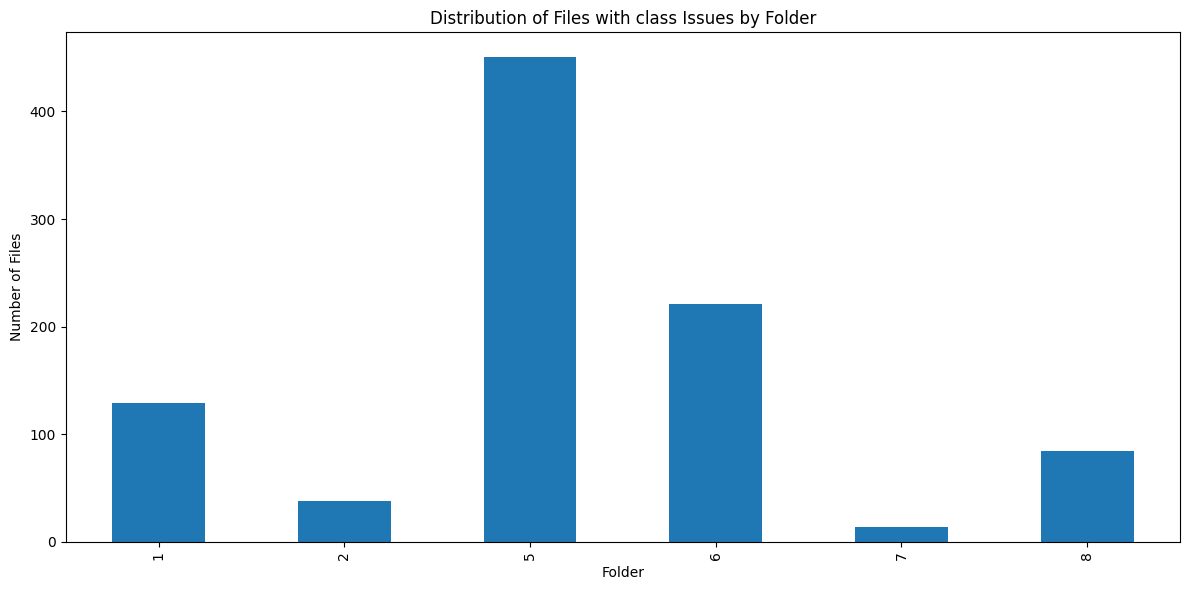

In [ ]:
import pandas as pd
import numpy as np
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_file_classes(base_dir):
    """
    Analyze files to identify those with mixed or invalid classes
    """
    file_analysis = []

    for folder in range(9):
        folder_path = os.path.join(base_dir, str(folder))
        if not os.path.exists(folder_path):
            continue

        files = glob.glob(os.path.join(folder_path, '*.csv'))

        for file in tqdm(files, desc=f'Analyzing folder {folder}'):
            try:
                df = pd.read_csv(file, usecols=['class'])
                unique_classes = df['class'].unique()

                # Analyze class values in this file
                invalid_classes = [c for c in unique_classes if pd.notna(c) and c not in range(9)]
                nan_count = df['class'].isna().sum()

                if len(unique_classes) > 1 or invalid_classes or nan_count > 0:
                    file_analysis.append({
                        'file': file,
                        'folder': folder,
                        'unique_classes': unique_classes,
                        'invalid_classes': invalid_classes,
                        'nan_count': nan_count,
                        'total_rows': len(df),
                        'class_counts': df['class'].value_counts().to_dict()
                    })

            except Exception as e:
                print(f"Error processing file {file}: {str(e)}")

    return pd.DataFrame(file_analysis)

def map_anomalous_classes(class_value):
    """
    Map anomalous class values to correct ones based on patterns
    101 -> 1, 102 -> 2, etc.
    """
    if pd.isna(class_value):
        return np.nan

    if class_value >= 100:
        return class_value % 100

    return class_value

def print_analysis_summary(analysis_df):
    """
    Print summary of the analysis
    """
    print("\n=== class Analysis Summary ===")
    print(f"Total files with issues: {len(analysis_df)}")
    print("\nFiles with multiple class values:")
    print(f"Count: {len(analysis_df[analysis_df['unique_classes'].apply(len) > 1])}")

    print("\nFiles with NaN values:")
    print(f"Count: {len(analysis_df[analysis_df['nan_count'] > 0])}")

    print("\nFiles with invalid classes:")
    print(f"Count: {len(analysis_df[analysis_df['invalid_classes'].apply(len) > 0])}")

    # Create mapping suggestion
    print("\nProposed class value mapping:")
    for old_val in sorted(set([x for lst in analysis_df['invalid_classes'].tolist() for x in lst])):
        print(f"{old_val} -> {map_anomalous_classes(old_val)}")

# Run analysis
analysis_df = analyze_file_classes(BASE_DIR)
print_analysis_summary(analysis_df)

# Visualize distribution of problematic files across folders
plt.figure(figsize=(12, 6))
analysis_df['folder'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Files with class Issues by Folder')
plt.xlabel('Folder')
plt.ylabel('Number of Files')
plt.tight_layout()
plt.show()